# 0_read_data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 35) ## 생략 없이 한 번에 띄울 피쳐수 = 35
import warnings
warnings.filterwarnings('ignore')
from my_func import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",family="Malgun Gothic") ## 폰트       한글 깨짐
plt.rc("axes",unicode_minus=False)    ## 폰트 minus 부호 깨짐
plt.style.use("ggplot")

df1 = pd.read_parquet( "data\df1.parquet" )
df3 = pd.read_parquet( "data\df3.parquet" )

def sp():
    print(f"     {df1.shape[0]:,} x {df1.shape[1]}          {df3.shape[0]:,} x {df3.shape[1]}")
    display(df1.head(1))
    display(df3.head(1))
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [2]:
### df1, df3 시계열 추출 피쳐 삭제
df1 = df1[['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign', 'buy', 'buy_cut', 'm_id', 'pre', 'post', 'c_back', 'dscnt', 'total', 'c_back_R', 'dscnt_R', 'total_R', 'cnt_b']]
df3 = df3[['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign', 'sign_cut', 'pre', 'post', 'c_back', 'dscnt', 'total', 'c_back_R', 'dscnt_R', 'total_R', 'cnt_p', 'cnt_b']]
sp()

     5,623,810 x 19          544,921 x 18


,id,age,man,push,frgn,birth,sign,buy,buy_cut,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,2019-08-01,9,43000,35000,0,8000,8000,0.0,18.6,18.6,1


,id,age,man,push,frgn,birth,sign,sign_cut,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2


In [4]:
### 남/여 최고 매출 1등 정보
display(data1.sort_values(by="pre",ascending=False).head(1))
display(data2.sort_values(by="pre",ascending=False).head(1))

,id,age,man,push,frgn,birth,sign,sign_cut,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
377380,377381,48,1,1,0,1973-08-22,2019-08-02 20:41:51.412,2019-08-02,115005350,112273800,0,2731550,2731550,0.0,2.4,2.4,1,175


,id,age,man,push,frgn,birth,sign,sign_cut,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
445690,445691,30,0,1,0,1991-06-14,2019-06-14 11:11:05.813,2019-06-14,35043786,34447704,216690,596082,812772,0.6,1.7,2.3,1,2630


남성: 70명     여성: 42명


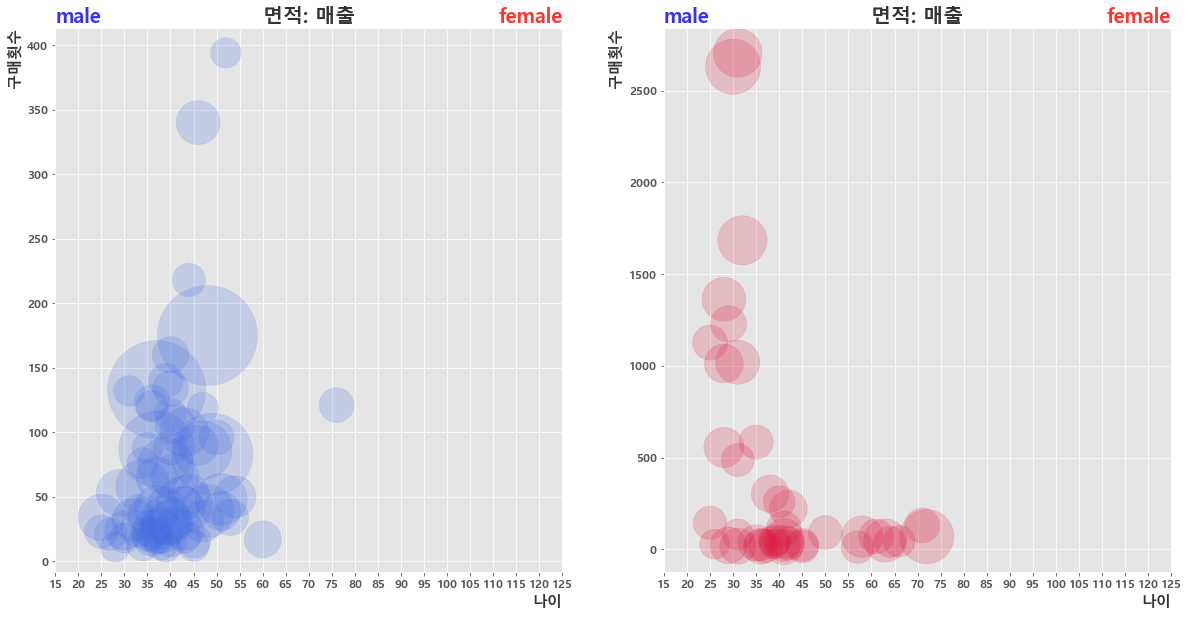

In [5]:
### 천만원 이상 구매한 남성, 여성
data1 = df3.loc[(df3.man==1)&(df3.pre>=1e+7)]
data2 = df3.loc[(df3.man==0)&(df3.pre>=1e+7)]
print(f"남성: {len(data1):,}명     여성: {len(data2):,}명")
a(data1,data2)

In [6]:
### 50만원 할인받은자 ---> 2명
display(df1.loc[df1.id==276087])
display(df1.loc[df1.id==177212])

,id,age,man,push,frgn,birth,sign,buy,buy_cut,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_b
47124,276087,39,1,1,0,1982-03-23,2019-06-04 17:41:01.322,2019-08-01 23:25:56.135,2019-08-01,3,10730,2730,0,8000,8000,0.0,74.6,74.6,1
800710,276087,39,1,1,0,1982-03-23,2019-06-04 17:41:01.322,2019-09-04 20:41:57.177,2019-09-04,9,1348280,848280,0,500000,500000,0.0,37.1,37.1,1


,id,age,man,push,frgn,birth,sign,buy,buy_cut,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_b
46583,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-01 23:17:24.451,2019-08-01,6,16700,11700,0,5000,5000,0.0,29.9,29.9,1
51007,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-02 07:29:57.541,2019-08-02,10,20600,18600,0,2000,2000,0.0,9.7,9.7,1
69764,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-03 11:34:19.117,2019-08-03,10,18800,16800,0,2000,2000,0.0,10.6,10.6,1
97776,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-05 03:01:41.607,2019-08-05,8,7300,4300,0,3000,3000,0.0,41.1,41.1,1
98008,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-05 03:15:33.568,2019-08-05,5,27000,24000,0,3000,3000,0.0,11.1,11.1,1
102979,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-05 08:38:13.269,2019-08-05,9,9900,9900,0,0,0,0.0,0.0,0.0,1
150208,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-07 07:58:29.100,2019-08-07,9,25800,23800,0,2000,2000,0.0,7.8,7.8,1
150295,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-07 08:07:21.248,2019-08-07,5,20700,18700,0,2000,2000,0.0,9.7,9.7,1
150312,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-07 08:08:43.399,2019-08-07,4,87000,85000,0,2000,2000,0.0,2.3,2.3,1
215981,177212,32,1,1,1,1989-04-22,2019-05-29 18:26:59.748,2019-08-10 19:09:38.366,2019-08-10,3,8010,7120,0,890,890,0.0,11.1,11.1,1


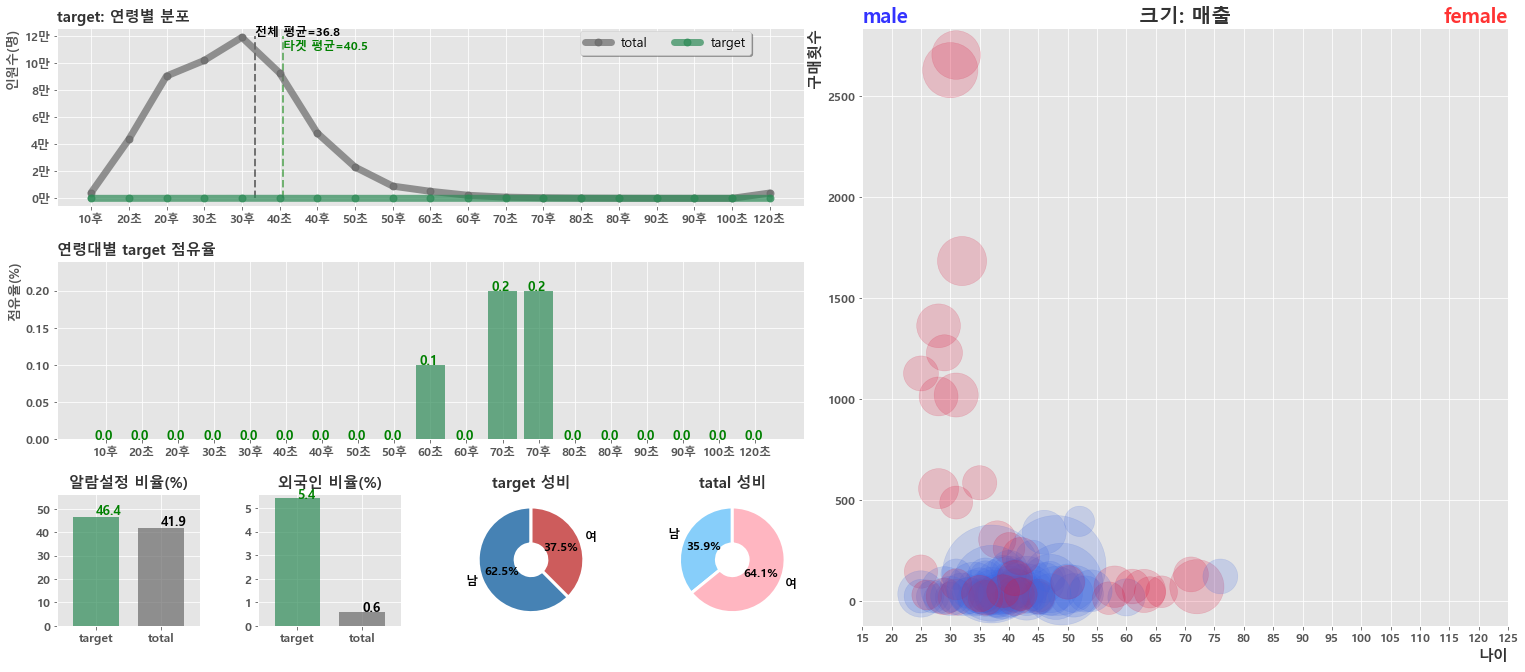

In [3]:
analysis(df3.loc[df3.pre>=1e+7]) ### 천만원 이상 매출 유저

In [4]:
int(4.2), int(-4.2)

(4, -4)

In [7]:
from math import floor as f
f(4.2), f(-4.2)

(4, -5)